In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams["figure.figsize"] = (10, 6)

In [2]:
main_data = pd.read_csv("Car details v3.csv")

In [3]:
main_data.shape

(8128, 13)

## EDA

In [4]:
main_data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
main_data.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [6]:
main_data.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [7]:
main_data.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [8]:
# seats, torque and max_power features are not necessary so let's drop it

main_data.drop(columns = ["seats", "torque", "max_power"], inplace=True)

In [9]:
# For now let's make NaN value as 0 in mileage and engine column

main_data.fillna(0, inplace=True)

In [10]:
# let's see the data where mileage value and engine values are 0

main_data.loc[main_data.mileage == 0].head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,0,0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0,0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,0,0
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0,0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,0,0


- we can see that Car company and name are same but car version are differnce
- we can replace that 0 mileage value with mean value of same care name's mileage value
- we can replace that 0 engine value with median value of same care name's engine value

In [11]:
# let's split the numeric values from mileage and engine and convert it into float or int

main_data.mileage = main_data.mileage.apply(lambda x: float(str(x).split()[0]))
main_data.engine = main_data.engine.apply(lambda x: int(str(x).split()[0]))
main_data.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
820,Toyota Innova 2.5 VX (Diesel) 7 Seater,2014,1019999,88000,Diesel,Individual,Manual,Second Owner,12.99,2494
3034,Hyundai Verna 1.6 VTVT AT SX,2017,1000000,15000,Petrol,Individual,Automatic,First Owner,17.01,1591


In [12]:
# let's separate company and car name from name column

main_data["comp_car_name"] = main_data.name.apply(lambda x: str(x).split()[0] + " " + str(x).split()[1])
main_data.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
7951,Hyundai Creta 1.6 SX,2018,1220000,11000,Petrol,Individual,Manual,First Owner,15.8,1591,Hyundai Creta
1113,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3,1598,Skoda Rapid


In [13]:
# let's check how many records have 0 mileage values

len(main_data.loc[main_data.mileage == 0])

238

In [14]:
# now let's fill the mileage value with mean value of same car name's mileage values wherever it has 0 value

dropable_index = []
for i in main_data.loc[main_data.mileage == 0].index:
    missing_mileage_car_name = main_data.loc[i, "comp_car_name"]
    avg_mileage = main_data.loc[(main_data.name.str.contains(missing_mileage_car_name)) & (main_data.mileage !=0), "mileage"].mean()
    if np.nan is avg_mileage:
        # here if mean value is nan then it means in our data set there are no other same company name car available
        # so for that we have one option we have to drop that records
        dropable_index.append(i)
    else:
        main_data.loc[i, "mileage"] = avg_mileage

# let's drop those records which i did not able to fill the mileage value because that car name was unique
main_data.drop(dropable_index, axis=0, inplace=True)
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
5602,Honda City 2017-2020 EXi,2007,170000,110000,Petrol,Individual,Manual,Third Owner,17.7,1497,Honda City
4521,Maruti Swift Dzire VDI,2013,480000,80000,Diesel,Individual,Manual,First Owner,23.4,1248,Maruti Swift
6323,Maruti Zen VXI,2003,200000,121000,Petrol,Individual,Manual,First Owner,17.3,993,Maruti Zen


In [15]:
# let's see how many records have 0 value in engine column

len(main_data.loc[main_data.engine == 0])

200

In [16]:
# now let's fill the engine value with median value of same car name's engine value wherever engine value is 0

for i in main_data.loc[main_data.engine == 0].index:
    missing_engine_car_name = main_data.loc[i, "comp_car_name"]
    median_engine = main_data.loc[(main_data.name.str.contains(missing_engine_car_name)) & (main_data.engine != 0), "engine"].median()
    
    main_data.loc[i, "engine"] = median_engine

main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
3142,Tata Indigo LS,2011,175000,85700,Diesel,Individual,Manual,Second Owner,17.00,1405.0,Tata Indigo
3147,Maruti Baleno Delta 1.2,2016,562000,25339,Petrol,Individual,Manual,First Owner,21.40,1197.0,Maruti Baleno
4249,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,BMW X4


In [17]:
# let's see how many records are remaining with 0 engine value

len(main_data.loc[main_data.engine == 0])

0

###  Exploring Name Feature

In [18]:
# let's find unique values of name columns

main_data.name.nunique()

2043

##### Observation:
- we have 2058 unique cars

### Exploring Years Feature

In [19]:
# let's find unique values of year columns

main_data.year.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2003, 2008, 2020, 1999, 2000, 2004,
       1994, 1998, 1997, 1995, 1996, 1991])

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


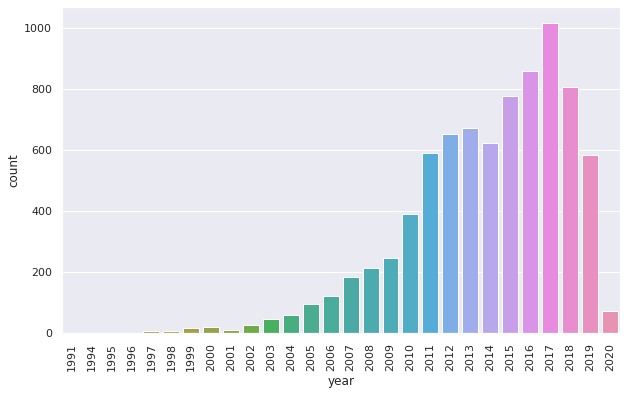

In [20]:
# let's plot it using count plot it see the variation of years
sns.countplot(main_data.year)
plt.xticks(rotation=90)
plt.show()

##### Observation:
- We have cars from year 1983 to 2020

### Exploring Km Driven Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

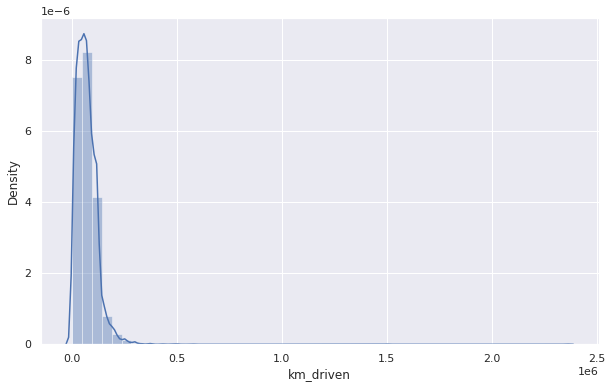

In [21]:
# let's see the data distribution of km_driven

sns.distplot(main_data.km_driven)

In [22]:
# let's see min and max value

print("Minimum Km Driven:", main_data.km_driven.min())
print("Maximum Km Driven:", main_data.km_driven.max())

Minimum Km Driven: 1
Maximum Km Driven: 2360457


##### Observation:
- Our Km Driven data is right skewed but it's okay some cars are old so it driven more than lac KM

### Exploring Fuel Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


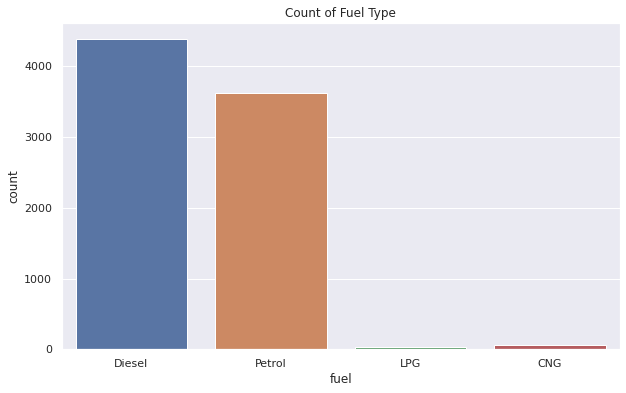

In [23]:
# let's see the variation of fuel type

sns.countplot(main_data.fuel)
plt.title("Count of Fuel Type")
plt.show()

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


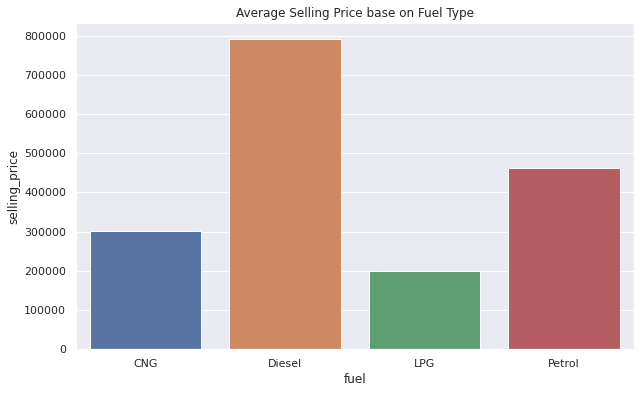

In [24]:
# Let's find avg price of the car according to it's fuel type

avg_fuel_selling_price = main_data.groupby("fuel").selling_price.mean().reset_index()
sns.barplot(avg_fuel_selling_price.fuel, avg_fuel_selling_price.selling_price)
plt.title("Average Selling Price base on Fuel Type")
plt.show()

##### Observation:
- Maximum cars are run on Diesel and Petrol fuel and some are on LPG and CNG
- The cars which has Diesel fuel type it's selling price is high 
- so Fuel type is affect to selling price

### Exploring Seller Type Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


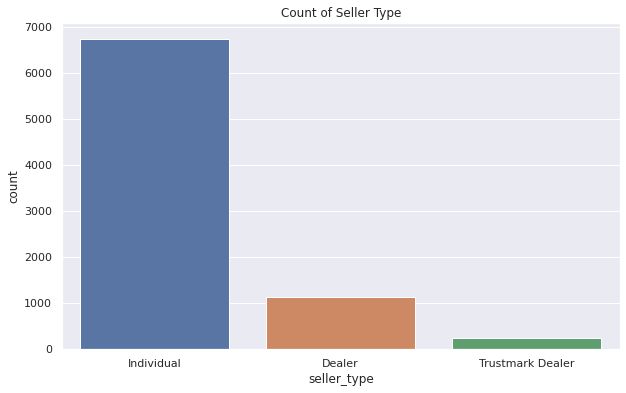

In [25]:
# let's look at seller_type 

sns.countplot(main_data.seller_type)
plt.title("Count of Seller Type")
plt.show()

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


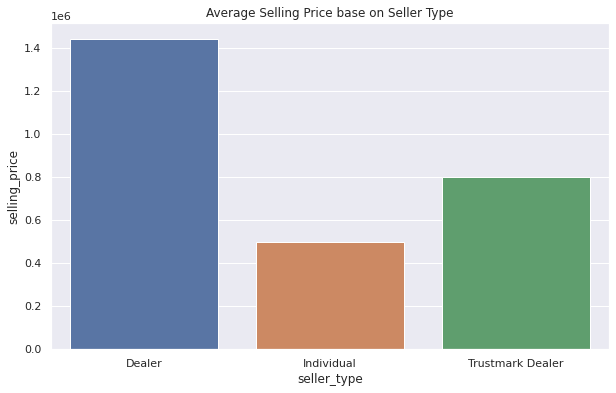

In [26]:
# let's see seller_type feature affect on selling price or not

avg_seller_type_selling_price = main_data.groupby("seller_type").selling_price.mean().reset_index()

sns.barplot(avg_seller_type_selling_price.seller_type, avg_seller_type_selling_price.selling_price)
plt.title("Average Selling Price base on Seller Type")
plt.show()

##### Observation:
- Individual Sellers are high than Dealer and Tustmark Delaer
- Selling Price is high when seller type are Dealer and Trustmark Dealer
- so Seller Type affect to Selling Price

### Exploring Transmission Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


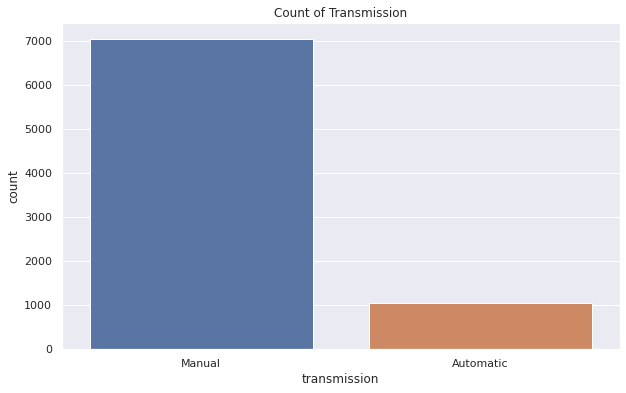

In [27]:
# let's look at transmission types

sns.countplot(main_data.transmission)
plt.title("Count of Transmission")
plt.show()

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


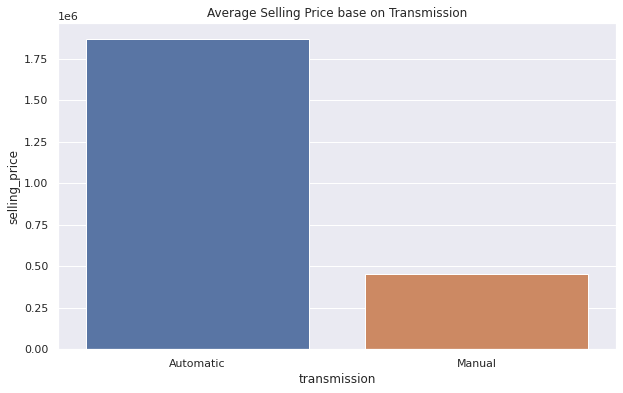

In [28]:
# let's see the average selling price manual and automatic transmission

avg_transmission_selling_price = main_data.groupby("transmission").selling_price.mean().reset_index()

sns.barplot(avg_transmission_selling_price.transmission, avg_transmission_selling_price.selling_price)
plt.title("Average Selling Price base on Transmission")
plt.show()

##### Observation:
- We have more cars which have a manual transmission compare to automatic transmission
- The Selling price of an automatic transmission are high than manual transmission
- so here transmission types are affect to selling price

### Exploring Owner Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


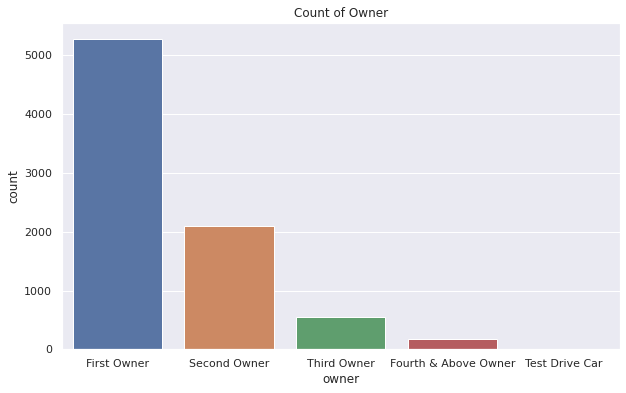

In [29]:
# let's look at owner category

sns.countplot(main_data.owner)
plt.title("Count of Owner")
plt.show()

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


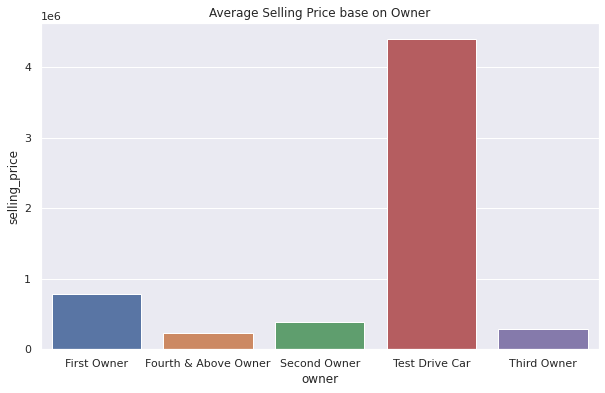

In [30]:
# let's see the average selling price base on owner

avg_owner_selling_price = main_data.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

In [31]:
# Average selling price of owner type test drive car is very high it might be an outlier let's see the data
# which have owner type is Test Drive Car

main_data.loc[main_data.owner == "Test Drive Car"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,Volkswagen Vento
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,Honda Civic


In [32]:
main_data.loc[main_data.name == "Volkswagen Vento 1.5 TDI Highline BSIV"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,Volkswagen Vento


- Here we can see the cars which belongs to Test Drive Car category of owner are unique models
- Owner Type Test Drive Car are 5 records and 3 unique model so we can easily drop it to remove that outlier

In [33]:
# let's drop records which has Test Drive Car owner type

main_data.drop(main_data.loc[main_data.owner == "Test Drive Car"].index, axis=0, inplace=True)

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


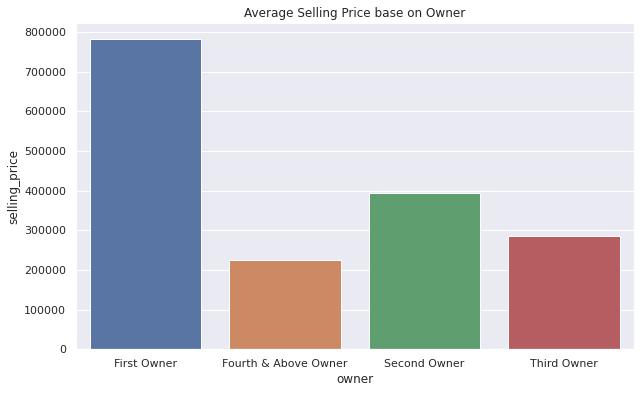

In [34]:
# now again let's see the average selling price base on owner

avg_owner_selling_price = main_data.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

##### Observation:
- We have more cars from first owner
- The car selling price is more when owner is first compare to other owner
- so here owner feature is affect to selling price

### Exploring Mileage Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


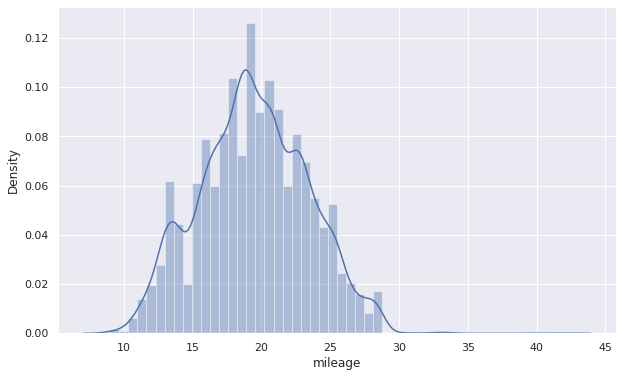

In [35]:
# let's look the data distribution of mileage column

sns.distplot(main_data.mileage)
plt.show()

##### Observation:
- Here mileage data are noramlly distributed so our regression model will perform better on normal distribution data
- Mileage feature is important for car so it is affect on selling price

### Exploring Engine Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


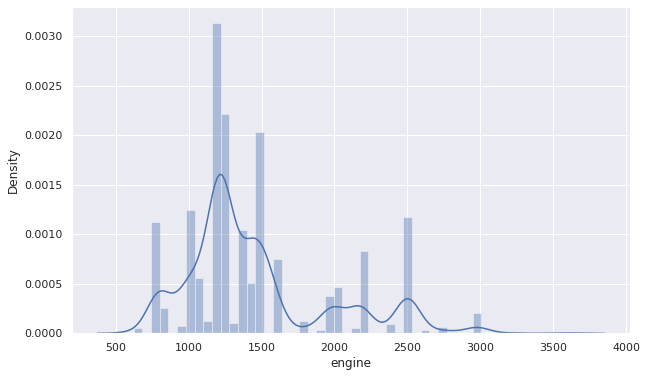

In [36]:
# let's look at engine

sns.distplot(main_data.engine)
plt.show()

In [37]:
main_data[["engine", "selling_price"]].corr()

,engine,selling_price
engine,1.000000,0.458291
selling_price,0.458291,1.000000


##### Observation:
- The data of engine is not normally distributed but engine size is really matter for car
- We can see engine is highly co-relates with selling price

### Exploring Target Feature

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


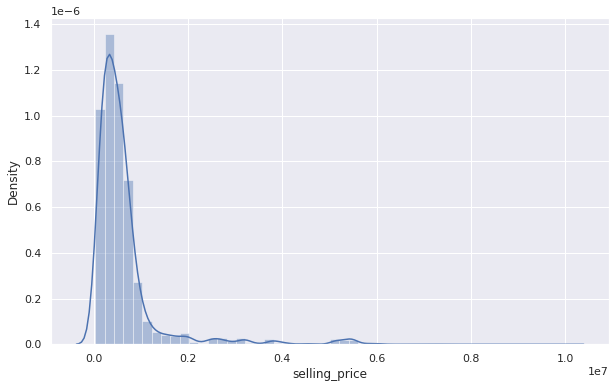

In [38]:
# let's look at the data distribution of selling_price

sns.distplot(main_data.selling_price)
plt.show()

- Selling price data are distributed in righ skewed, there may be chance of outliers let's try to find it

In [39]:
# finding upper and lower limit using percertile 
# here i'm going to use 99.9% for upper limit and 0.1% for lower limit

lower_limit = main_data.selling_price.quantile(0.001)
upper_limit = main_data.selling_price.quantile(0.999)

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 35000.0
Upper Limit: 5848000.000000011


In [40]:
# let's see the data which are below the range of lower limit

main_data.loc[main_data.selling_price < lower_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
1926,Maruti 800 Std,2004,31504,110000,Petrol,Individual,Manual,Third Owner,16.100000,796.0,Maruti 800
2145,Maruti Zen LXI,2001,30000,10000,Petrol,Individual,Manual,First Owner,17.300000,993.0,Maruti Zen
3919,Hyundai Santro LE,2001,33983,80000,Petrol,Individual,Manual,Second Owner,18.239178,1086.0,Hyundai Santro
4811,Maruti Wagon R VXI,2004,33351,90000,Petrol,Individual,Manual,Third Owner,18.900000,998.0,Maruti Wagon
5714,Maruti 800 AC,1997,29999,80000,Petrol,Individual,Manual,Third Owner,16.100000,796.0,Maruti 800
5965,Maruti 800 Std,2000,31000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.100000,796.0,Maruti 800
6776,Hyundai Santro GLS I - Euro I,2000,30000,90000,Petrol,Individual,Manual,Third Owner,18.239178,1086.0,Hyundai Santro


In [41]:
# let's see the data which are below the limit of upper limit

main_data.loc[main_data.selling_price > upper_limit]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
136,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
148,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,Volvo XC90
1071,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
2938,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,BMW X7
4101,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
4766,BMW 6 Series GT 630d Luxury Line,2018,6000000,27000,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,BMW 6
5258,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class
7713,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,Mercedes-Benz S-Class


In [42]:
main_data.selling_price.describe()

count    8.101000e+03
mean     6.365642e+05
std      7.991429e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

##### Observation:
- Here selling price data are not normally distributed it's right skewed because most of the car price are high
- Lower selling price is 29999 of maruti car and Higher price is 10000000 of Volvo car these are normal it's not an outlier

## Feature Engineering

In [43]:
# let's do target guided label encoding for name columns

car_name_encoded = main_data.groupby("name").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting name and index value into dict using zip then map it with origial series
main_data.name = main_data.name.map(dict(zip(car_name_encoded.name, car_name_encoded.index)))
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
1587,1488,2015,600000,63000,Diesel,Individual,Manual,First Owner,22.77,1498.0,Ford EcoSport
5328,1568,2018,750000,50000,Diesel,Individual,Manual,First Owner,16.50,1493.0,Mahindra Bolero
2924,1035,2018,580000,120000,Diesel,Individual,Manual,First Owner,23.40,1248.0,Maruti Swift


In [44]:
# let's do target guided label encoding for fuel type bcz diesel cars has high price compare to other

fuel_encoded = main_data.groupby("fuel").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# converting fuel and index value into dict using zip then map it with original series
main_data.fuel = main_data.fuel.map(dict(zip(fuel_encoded.fuel, fuel_encoded.index)))
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
16,1679,2016,778000,70000,3,Individual,Manual,Second Owner,24.52,1248.0,Maruti Ertiga
3536,756,2013,345000,40000,3,Individual,Manual,First Owner,21.90,1396.0,Hyundai i20
254,286,2013,170000,162500,3,Individual,Manual,First Owner,19.40,1405.0,Tata Indica


In [45]:
# let's encode seller_type using target guided encoding

seller_type_encoded = main_data.groupby("seller_type").selling_price.mean().sort_values().reset_index().drop(columns="selling_price")

# creating dict using enumerator and key as count value and value as seller_type_encoded value then map it with original series
main_data.seller_type = main_data.seller_type.map({k:v for v, k in enumerate(seller_type_encoded.seller_type, 0)})
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
549,1701,2017,775000,32000,3,2,Manual,First Owner,24.3,1248.0,Maruti Vitara
5940,1289,2017,755000,20000,3,0,Manual,First Owner,28.4,1248.0,Maruti Swift
3075,452,2014,215000,50000,2,0,Manual,First Owner,21.1,814.0,Hyundai EON


In [46]:
# let's encode transmission using one hot encoding
# in transmission column we have two values Manual and Automatic

transmission_encoded = pd.get_dummies(main_data.transmission, prefix="transmission", drop_first=True)
# here droping first value to prevent dummy variable trap, first value was Automatic so 0 will represent that value

# let's concat encoded transmission series with main_data data frame

main_data = pd.concat([main_data, transmission_encoded], axis=1)
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name,transmission_Manual
3335,1043,2018,450000,35000,2,0,Manual,First Owner,20.30,1199.0,Tata Tigor,1
4331,1313,2017,625000,25538,2,1,Manual,First Owner,16.78,1496.0,Toyota Etios,1
1374,852,2009,350000,54290,2,2,Manual,First Owner,17.00,1497.0,Honda City,1


In [47]:
# let's split owner value and encode it according to it's number

main_data.owner = main_data.owner.apply(lambda x: str(x).split()[0])

# now let's do label encoding

main_data.owner = main_data.owner.map({"First": 1, "Second": 2, "Third": 3, "Fourth": 4})
main_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name,transmission_Manual
938,35,2007,90000,90000,2,0,Manual,1,16.10,796.0,Maruti 800,1
1720,1313,2017,625000,25538,2,1,Manual,1,16.78,1496.0,Toyota Etios,1
3440,482,2008,210000,100000,3,0,Manual,1,19.61,1405.0,Tata Indigo,1


In [48]:
# let's drop transission and comp_car_name and make a final_data data frame

final_data = main_data.drop(columns = ["transmission", "comp_car_name"]).copy()

In [49]:
final_data.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,transmission_Manual
2096,499,2015,270000,49900,2,0,2,22.74,796.0,1
3112,1855,2019,1150000,31000,2,2,1,15.80,1591.0,1
2334,497,2012,259000,35000,3,0,1,23.03,1396.0,1


In [50]:
# let's create feature matrix X and target vector y

X = final_data.drop(columns="selling_price")
y = final_data.selling_price

/home/jaysoftc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

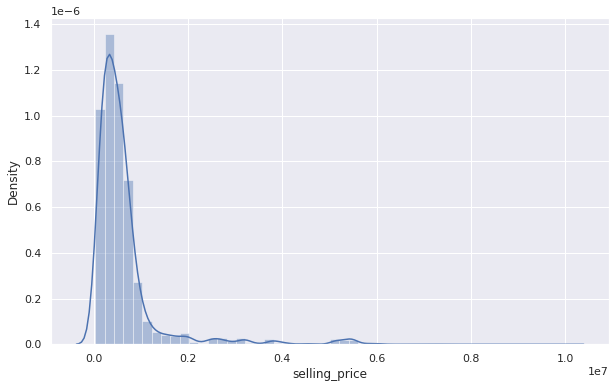

In [51]:
sns.distplot(y)

In [52]:
# let's split the data into train and test data set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((6480, 9), (6480,)), ((1621, 9), (1621,)))

### Model Building

#### Model training using following algorithms
- linear regression
- ridge regression
- lasso regression
- decision tree
- random forest
- ada boost
- gradient boost
- xg boost

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0, 1, 0.01)
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": np.arange(0, 1, 0.01)
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion": ["mse", "friedman_mse", "mae"],
            "splitter": ["best", "random"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]            
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "criterion": ["mse", "friedman_mse", "mae"],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "max_features": ["auto", "log2", "sqrt", None]
        }
    },
    "Ada Boost": {
        "model": AdaBoostRegressor(),
        "params": {
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "learning_rate": np.arange(0, 1, 0.01),
            "loss": ['linear', 'square', 'exponential']
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingRegressor(),
        "params": {
            "learning_rate": np.arange(0, 1, 0.01),
            "n_estimators": np.linspace(100, 1200, 12).astype(int),
            "criterion": ['friedman_mse', 'mse', 'mae'],
            "min_samples_split": [2, 4, 6, 8, 10, 15, 20],
            "min_samples_leaf": [i for i in range(1, 11)],
            "max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],
            "max_features": ["auto", "log2", "sqrt", None],
            "max_leaf_nodes": [None] + [i for i in range(10, 91, 10)],
            "alpha": np.arange(0, 1, 0.01)
        }
    }
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import time

start_time = time.time()
best_model = {}
best_model_details = []

for model_name, values in algos.items():
    rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=10, n_jobs=-1, verbose=2, random_state=4)
    rscv.fit(X_train, y_train)
    best_model[model_name] = rscv
    best_model_details.append({"Model Name": model_name, "Best Score": rscv.best_score_, "Best Parameters": rscv.best_params_})


print("--------------------------------------------------------")
print(f"it takes {(time.time() - start_time) / 60} minutes")
print("--------------------------------------------------------")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/jaysoftc/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 54.8min finished


--------------------------------------------------------
it takes 80.42242058912913 minutes
--------------------------------------------------------


In [55]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

,Model Name,Best Score,Best Parameters
0,Linear Regression,0.577775,{}
1,Ridge,0.577775,{'alpha': 0.1}
2,Lasso,0.577775,{'alpha': 0.97}
3,Decision Tree,0.974661,"{'splitter': 'best', 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 7, 'criterion': 'friedman_mse'}"
4,Random Forest,0.978031,"{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 14, 'criterion': 'mae'}"
5,Ada Boost,0.967908,"{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.12}"
6,Gradient Boost,0.977921,"{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_leaf_nodes': 60, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.07, 'criterion': 'mae', 'alpha': 0.5}"


In [56]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(X_test, y_test)})

pd.DataFrame(test_model)


,Model Name,Test Score
0,Linear Regression,0.577754
1,Ridge,0.577762
2,Lasso,0.577755
3,Decision Tree,0.980964
4,Random Forest,0.981824
5,Ada Boost,0.969928
6,Gradient Boost,0.986117


In [57]:
# Gradient Boost work better here, let's make it as final model

final_model = best_model["Random Forest"]

#let's find out mean square error, root mean square error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Square Error: 9861531966.869682
Root Mean Square Error: 99305.24642167543
Mean Absolute Error: 54131.62875077113


##### Observation:
- I got around 98% accuracy but RMSE is 105790 and MAE is 49412
- so on an average i will get 49412 error from this model
- I got huge error because target value is also high it is around 50-80 lakhs

In [58]:
import pickle
# let's save models and appropriate encoding files, it will help me to predict on web app

# let's save encoded data frame as csv files, if save it in json format it will take more memory than csv file
car_name_encoded.to_csv("car_name_encoded.csv", index=False)
fuel_encoded.to_csv("fuel_encoded.csv", index=False)
seller_type_encoded.to_csv("seller_type.csv", index=False)

# let's save the model into pickle file
with open("car_price_model.pickle", "wb") as f:
    pickle.dump(final_model, f)